<a href="https://colab.research.google.com/github/yiyichanmyae/CNN/blob/main/horse_human_detection_cnn_tf_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Install this package to use Colab's GPU for training
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcudnn8 is already the newest version (8.4.1.50-1+cuda11.6).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


Run the code below to download the compressed dataset `horse-or-human.zip`.

In [34]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-08-21 20:54:59--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.2’

horse-or-human.zip. 100%[===================>] 142.65M   295MB/s    in 0.5s    

2022-08-21 20:54:59 (295 MB/s) - ‘horse-or-human.zip.2’ saved [149574867/149574867]



In [35]:
# unzip datafolder

import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horsde-or-human')
zip_ref.close()

In [36]:
import os

# directory with training horse pictures
train_horse_dir = os.path.join('./horsde-or-human/horses')

# directory with training horse pictures
train_human_dir = os.path.join('./horsde-or-human/humans')


In [37]:
# list the pic under the directories

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse17-7.png', 'horse46-5.png', 'horse23-7.png', 'horse24-3.png', 'horse02-0.png', 'horse16-3.png', 'horse40-6.png', 'horse23-6.png', 'horse22-8.png', 'horse15-2.png']
['human08-08.png', 'human05-00.png', 'human09-15.png', 'human01-24.png', 'human08-11.png', 'human05-21.png', 'human01-07.png', 'human05-08.png', 'human03-01.png', 'human09-09.png']


In [38]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


next horse pix : ['./horsde-or-human/horses/horse17-7.png', './horsde-or-human/horses/horse46-5.png', './horsde-or-human/horses/horse23-7.png', './horsde-or-human/horses/horse24-3.png', './horsde-or-human/horses/horse02-0.png', './horsde-or-human/horses/horse16-3.png', './horsde-or-human/horses/horse40-6.png', './horsde-or-human/horses/horse23-6.png']
next human pix : ['./horsde-or-human/humans/human08-08.png', './horsde-or-human/humans/human05-00.png', './horsde-or-human/humans/human09-15.png', './horsde-or-human/humans/human01-24.png', './horsde-or-human/humans/human08-11.png', './horsde-or-human/humans/human05-21.png', './horsde-or-human/humans/human01-07.png', './horsde-or-human/humans/human05-08.png']


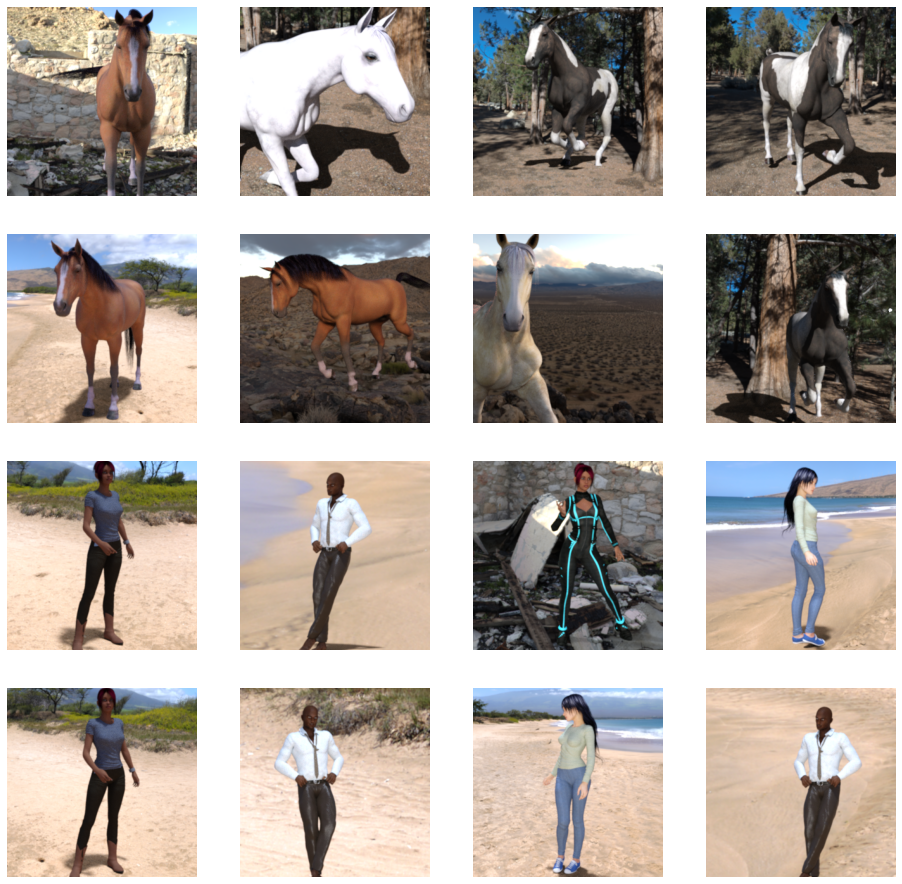

In [39]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [
    os.path.join(train_horse_dir, fname)
    for fname in train_horse_names[pic_index-8:pic_index]
]
next_human_pix = [
    os.path.join(train_human_dir, fname)
    for fname in train_human_names[pic_index-8:pic_index]
]

print('next horse pix :', next_horse_pix)
print('next human pix :', next_human_pix)

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indeices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# Building a Small Model from Scratch

In [40]:
import tensorflow as tf

In [41]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 523 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a valu from 0-1
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 35, 35, 64)      

In [43]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

# Data Preprocessing

ata that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network.

n Keras, this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory).

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen
train_generator = train_datagen.flow_from_directory(
    './horsde-or-human/', # This is the source directory for training images
    target_size=(300, 300),  # All images will be resized to 300x300
    batch_size=128,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


# Training

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=8, # batch_size form ImageDataGenerator is 128, so that (128*8) will be cover whole training dataset
    epochs=15,
    verbose=1
)

Epoch 1/15
5/8 [=================>............] - ETA: 33s - loss: 0.8758 - accuracy: 0.4906

# Model Prediction

In [ ]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' +fn
  print('path to predict : ', path)
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0) # eg., from shape (5,) to (1,5)

  images = np.vstack(np.vstack([x]))
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn +  "is a human")
  else:
    print(fn + "is a horse")

`Safari` users will need to upload the images(s) manually in their workspace. Please follow the instructions, uncomment the code block below and run it.

Instructions on how to upload image(s) manually in a Colab:

1. Select the `folder` icon on the left `menu bar`.
2. Click on the `folder with an arrow pointing upwards` named `..`
3. Click on the `folder` named `tmp`.
4. Inside of the `tmp` folder, `create a new folder` called `images`. You'll see the `New folder` option by clicking the `3 vertical dots` menu button next to the `tmp` folder.
5. Inside of the new `images` folder, upload an image(s) of your choice, preferably of either a horse or a human. Drag and drop the images(s) on top of the `images` folder.
6. Uncomment and run the code block below. 